(mc)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`Geometric Series for Elementary Economics <single: Geometric Series for Elementary Economics>`

```{contents} Contents
:depth: 2
```

## Overview

The lecture describes important ideas in economics that use the mathematics of geometric series.

Among these are

- the Keynesian **multiplier**
- the money **multiplier** that prevails in fractional reserve banking
  systems
- interest rates and present values of streams of payouts from assets

(As we shall see below, the term **multiplier** comes down to meaning **sum of a convergent geometric series**)

These and other applications prove the truth of the wise crack that

```{epigraph}
"in economics, a little knowledge of geometric series goes a long way "
```

Below we'll use the following packages:

In [1]:
using LinearAlgebra, Statistics
using Distributions, LaTeXStrings, Plots, Random, Symbolics, Latexify

## Key Formulas

To start, let $c$ be a real number that lies strictly between
$-1$ and $1$.

- We often write this as $c \in (-1,1)$.
- Here $(-1,1)$ denotes the collection of all real numbers that
  are strictly less than $1$ and strictly greater than $-1$.
- The symbol $\in$ means *in* or *belongs to the set after the symbol*.

We want to evaluate geometric series of two types -- infinite and finite.

### Infinite Geometric Series

The first type of geometric that interests us is the infinite series

$$
1 + c + c^2 + c^3 + \cdots
$$

Where $\cdots$ means that the series continues without end.

The key formula is

```{math}
:label: infinite

1 + c + c^2 + c^3 + \cdots = \frac{1}{1 -c }
```

To prove key formula {eq}`infinite`, multiply both sides  by $(1-c)$ and verify
that if $c \in (-1,1)$, then the outcome is the
equation $1 = 1$.

### Finite Geometric Series

The second series that interests us is the finite geometric series

$$
1 + c + c^2 + c^3 + \cdots + c^T
$$

where $T$ is a positive integer.

The key formula here is

$$
1 + c + c^2 + c^3 + \cdots + c^T  = \frac{1 - c^{T+1}}{1-c}
$$

**Remark:** The above formula works for any value of the scalar
$c$. We don't have to restrict $c$ to be in the
set $(-1,1)$.

We now move on to describe some famous economic applications of
geometric series.

## Example: The Money Multiplier in Fractional Reserve Banking

In a fractional reserve banking system, banks hold only a fraction
$r \in (0,1)$ of cash behind each **deposit receipt** that they
issue

* In recent times
    - cash consists of pieces of paper issued by the government and
      called dollars or pounds or $\ldots$
    - a *deposit* is a balance in a checking or savings account that
      entitles the owner to ask the bank for immediate payment in cash
* When the UK and France and the US were on either a gold or silver
  standard (before 1914, for example)
    - cash was a gold or silver coin
    - a *deposit receipt* was a *bank note* that the bank promised to
      convert into gold or silver on demand; (sometimes it was also a
      checking or savings account balance)

Economists and financiers often define the **supply of money** as an
economy-wide sum of **cash** plus **deposits**.

In a **fractional reserve banking system** (one in which the reserve
ratio $r$ satisfies $0 < r < 1$), **banks create money** by issuing deposits *backed* by fractional reserves plus loans that they make to their customers.

A geometric series is a key tool for understanding how banks create
money (i.e., deposits) in a fractional reserve system.

The geometric series formula {eq}`infinite` is at the heart of the classic model of the money creation process -- one that leads us to the celebrated
**money multiplier**.

### A Simple Model

There is a set of banks named $i = 0, 1, 2, \ldots$.

Bank $i$'s loans $L_i$, deposits $D_i$, and
reserves $R_i$ must satisfy the balance sheet equation (because
**balance sheets balance**):

```{math}
:label: balance

L_i + R_i = D_i
```

The left side of the above equation is the sum of the bank's **assets**,
namely, the loans $L_i$ it has outstanding plus its reserves of
cash $R_i$.

The right side records bank $i$'s liabilities,
namely, the deposits $D_i$ held by its depositors; these are
IOU's from the bank to its depositors in the form of either checking
accounts or savings accounts (or before 1914, bank notes issued by a
bank stating promises to redeem note for gold or silver on demand).

Each bank $i$ sets its reserves to satisfy the equation

```{math}
:label: reserves

R_i = r D_i
```

where $r \in (0,1)$ is its **reserve-deposit ratio** or **reserve
ratio** for short

- the reserve ratio is either set by a government or chosen by banks
  for precautionary reasons

Next we add a theory stating that bank $i+1$'s deposits depend
entirely on loans made by bank $i$, namely

```{math}
:label: deposits

D_{i+1} = L_i
```

Thus, we can think of the banks as being arranged along a line with
loans from bank $i$ being immediately deposited in $i+1$

- in this way, the debtors to bank $i$ become creditors of
  bank $i+1$

Finally, we add an *initial condition* about an exogenous level of bank
$0$'s deposits

$$
D_0 \ \text{ is given exogenously}
$$

We can think of $D_0$ as being the amount of cash that a first
depositor put into the first bank in the system, bank number $i=0$.

Now we do a little algebra.

Combining equations {eq}`balance` and {eq}`reserves` tells us that

```{math}
:label: fraction

L_i = (1-r) D_i
```

This states that bank $i$ loans a fraction $(1-r)$ of its
deposits and keeps a fraction $r$ as cash reserves.

Combining equation {eq}`fraction` with equation {eq}`deposits` tells us that

$$
D_{i+1} = (1-r) D_i  \ \text{ for } i \geq 0
$$

which implies that

```{math}
:label: geomseries

D_i = (1 - r)^i D_0  \ \text{ for } i \geq 0
```

Equation {eq}`geomseries` expresses $D_i$ as the $i$ th term in the
product of $D_0$ and the geometric series

$$
1, (1-r), (1-r)^2, \cdots
$$

Therefore, the sum of all deposits in our banking system
$i=0, 1, 2, \ldots$ is

```{math}
:label: sumdeposits

\sum_{i=0}^\infty (1-r)^i D_0 =  \frac{D_0}{1 - (1-r)} = \frac{D_0}{r}
```

### Money Multiplier

The **money multiplier** is a number that tells the multiplicative
factor by which an exogenous injection of cash into bank $0$ leads
to an increase in the total deposits in the banking system.

Equation {eq}`sumdeposits` asserts that the **money multiplier** is
$\frac{1}{r}$

- An initial deposit of cash of $D_0$ in bank $0$ leads
  the banking system to create total deposits of $\frac{D_0}{r}$.
- The initial deposit $D_0$ is held as reserves, distributed
  throughout the banking system according to $D_0 = \sum_{i=0}^\infty R_i$.

## Example: The Keynesian Multiplier

The famous economist John Maynard Keynes and his followers created a
simple model intended to determine national income $y$ in
circumstances in which

- there are substantial unemployed resources, in particular **excess
  supply** of labor and capital
- prices and interest rates fail to adjust to make aggregate **supply
  equal demand** (e.g., prices and interest rates are frozen)
- national income is entirely determined by aggregate demand

### Static Version

An elementary Keynesian model of national income determination consists
of three equations that describe aggregate demand for $y$ and its
components.

The first equation is a national income identity asserting that
consumption $c$ plus investment $i$ equals national income
$y$:

$$
c+ i = y
$$

The second equation is a Keynesian consumption function asserting that
people consume a fraction $b \in (0,1)$ of their income:

$$
c = b y
$$

The fraction $b \in (0,1)$ is called the **marginal propensity to
consume**.

The fraction $1-b \in (0,1)$ is called the **marginal propensity
to save**.

The third equation simply states that investment is exogenous at level
$i$.

- *exogenous* means *determined outside this model*.

Substituting the second equation into the first gives $(1-b) y = i$.

Solving this equation for $y$ gives

$$
y = \frac{1}{1-b} i
$$

The quantity $\frac{1}{1-b}$ is called the **investment
multiplier** or simply the **multiplier**.

Applying the formula for the sum of an infinite geometric series, we can
write the above equation as

$$
y = i \sum_{t=0}^\infty b^t
$$

where $t$ is a nonnegative integer.

So we arrive at the following equivalent expressions for the multiplier:

$$
\frac{1}{1-b} =   \sum_{t=0}^\infty b^t
$$

The expression $\sum_{t=0}^\infty b^t$ motivates an interpretation
of the multiplier as the outcome of a dynamic process that we describe
next.

### Dynamic Version

We arrive at a dynamic version by interpreting the nonnegative integer
$t$ as indexing time and changing our specification of the
consumption function to take time into account

- we add a one-period lag in how income affects consumption

We let $c_t$ be consumption at time $t$ and $i_t$ be
investment at time $t$.

We modify our consumption function to assume the form

$$
c_t = b y_{t-1}
$$

so that $b$ is the marginal propensity to consume (now) out of
last period's income.

We begin with an initial condition stating that

$$
y_{-1} = 0
$$

We also assume that

$$
i_t = i \ \ \textrm {for all }  t \geq 0
$$

so that investment is constant over time.

It follows that

$$
y_0 = i + c_0 = i + b y_{-1} =  i
$$

and

$$
y_1 = c_1 + i = b y_0 + i = (1 + b) i
$$

and

$$
y_2 = c_2 + i = b y_1 + i = (1 + b + b^2) i
$$

and more generally

$$
y_t = b y_{t-1} + i = (1+ b + b^2 + \cdots + b^t) i
$$

or

$$
y_t = \frac{1-b^{t+1}}{1 -b } i
$$

Evidently, as $t \rightarrow + \infty$,

$$
y_t \rightarrow \frac{1}{1-b} i
$$

**Remark 1:** The above formula is often applied to assert that an
exogenous increase in investment of $\Delta i$ at time $0$
ignites a dynamic process of increases in national income by successive amounts

$$
\Delta i, (1 + b )\Delta i, (1+b + b^2) \Delta i , \cdots
$$

at times $0, 1, 2, \ldots$.

**Remark 2** Let $g_t$ be an exogenous sequence of government
expenditures.

If we generalize the model so that the national income identity
becomes

$$
c_t + i_t + g_t  = y_t
$$

then a version of the preceding argument shows that the **government
expenditures multiplier** is also $\frac{1}{1-b}$, so that a
permanent increase in government expenditures ultimately leads to an
increase in national income equal to the multiplier times the increase
in government expenditures.

## Example: Interest Rates and Present Values

We can apply our formula for geometric series to study how interest
rates affect values of streams of dollar payments that extend over time.

We work in discrete time and assume that $t = 0, 1, 2, \ldots$
indexes time.

We let $r \in (0,1)$ be a one-period **net nominal interest rate**

- if the nominal interest rate is $5$ percent,
  then $r= .05$

A one-period **gross nominal interest rate** $R$ is defined as

$$
R = 1 + r \in (1, 2)
$$

- if $r=.05$, then $R = 1.05$

**Remark:** The gross nominal interest rate $R$ is an **exchange
rate** or **relative price** of dollars at between times $t$ and
$t+1$. The units of $R$ are dollars at time $t+1$ per
dollar at time $t$.

When people borrow and lend, they trade dollars now for dollars later or
dollars later for dollars now.

The price at which these exchanges occur is the gross nominal interest
rate.

- If I sell $x$ dollars to you today, you pay me $R x$
  dollars tomorrow.
- This means that you borrowed $x$ dollars for me at a gross
  interest rate $R$ and a net interest rate $r$.

We assume that the net nominal interest rate $r$ is fixed over
time, so that $R$ is the gross nominal interest rate at times
$t=0, 1, 2, \ldots$.

Two important geometric sequences are

```{math}
:label: geom1

1, R, R^2, \cdots
```

and

```{math}
:label: geom2

1, R^{-1}, R^{-2}, \cdots
```

Sequence {eq}`geom1` tells us how dollar values of an investment **accumulate**
through time.

Sequence {eq}`geom2` tells us how to **discount** future dollars to get their
values in terms of today's dollars.

### Accumulation

Geometric sequence {eq}`geom1` tells us how one dollar invested and re-invested
in a project with gross one period nominal rate of return accumulates

- here we assume that net interest payments are reinvested in the
  project
- thus, $1$ dollar invested at time $0$ pays interest
  $r$ dollars after one period, so we have $r+1 = R$
  dollars at time$1$
- at time $1$ we reinvest $1+r =R$ dollars and receive interest
  of $r R$ dollars at time $2$ plus the *principal*
  $R$ dollars, so we receive $r R + R = (1+r)R = R^2$
  dollars at the end of period $2$
- and so on

Evidently, if we invest $x$ dollars at time $0$ and
reinvest the proceeds, then the sequence

$$
x , xR , x R^2, \cdots
$$

tells how our account accumulates at dates $t=0, 1, 2, \ldots$.

### Discounting

Geometric sequence {eq}`geom2` tells us how much future dollars are worth in terms of today's dollars.

Remember that the units of $R$ are dollars at $t+1$ per
dollar at $t$.

It follows that

- the units of $R^{-1}$ are dollars at $t$ per dollar at $t+1$
- the units of $R^{-2}$ are dollars at $t$ per dollar at $t+2$
- and so on; the units of $R^{-j}$ are dollars at $t$ per
  dollar at $t+j$

So if someone has a claim on $x$ dollars at time $t+j$, it
is worth $x R^{-j}$ dollars at time $t$ (e.g., today).

### Application to Asset Pricing

A **lease** requires a payments stream of $x_t$ dollars at
times $t = 0, 1, 2, \ldots$ where

$$
x_t = G^t x_0
$$

where $G = (1+g)$ and $g \in (0,1)$.

Thus, lease payments increase at $g$ percent per period.

For a reason soon to be revealed, we assume that $G < R$.

The **present value** of the lease is

$$
\begin{aligned} 
p_0  & = x_0 + x_1/R + x_2/(R^2) + \ddots \\
& = x_0 (1 + G R^{-1} + G^2 R^{-2} + \cdots ) \\
& = x_0 \frac{1}{1 - G R^{-1}} 
\end{aligned}
$$

where the last line uses the formula for an infinite geometric series.

Recall that $R = 1+r$ and $G = 1+g$ and that $R > G$
and $r > g$ and that $r$ and $g$ are typically small
numbers, e.g., .05 or .03.

Use the Taylor series of $\frac{1}{1+r}$ about $r=0$,
namely,

$$
\frac{1}{1+r} = 1 - r + r^2 - r^3 + \cdots
$$

and the fact that $r$ is small to approximate
$\frac{1}{1+r} \approx 1 - r$.

Use this approximation to write $p_0$ as

$$
\begin{aligned}
 p_0 &= x_0 \frac{1}{1 - G R^{-1}} \\
 &= x_0 \frac{1}{1 - (1+g) (1-r) } \\
 &= x_0 \frac{1}{1 - (1+g - r - rg)} \\
 & \approx x_0 \frac{1}{r -g }
\end{aligned}
$$

where the last step uses the approximation $r g \approx 0$.

The approximation

$$
p_0 = \frac{x_0 }{r -g }
$$

is known as the **Gordon formula** for the present value or current
price of an infinite payment stream $x_0 G^t$ when the nominal
one-period interest rate is $r$ and when $r > g$.

We can also extend the asset pricing formula so that it applies to finite leases.

Let the payment stream on the lease now be $x_t$ for $t= 1,2, \dots,T$, where again

$$
x_t = G^t x_0
$$

The present value of this lease is:

$$
\begin{aligned}
\begin{split}
p_0&=x_0 + x_1/R  + \dots +x_T/R^T \\ &= x_0(1+GR^{-1}+\dots +G^{T}R^{-T}) \\ &= \frac{x_0(1-G^{T+1}R^{-(T+1)})}{1-GR^{-1}}
\end{split}
\end{aligned}
$$

Applying the Taylor series to $R^{-(T+1)}$ about $r=0$ we get:

$$
\frac{1}{(1+r)^{T+1}}= 1-r(T+1)+\frac{1}{2}r^2(T+1)(T+2)+\dots \approx 1-r(T+1)
$$

Similarly, applying the Taylor series to $G^{T+1}$ about $g=0$:

$$
(1+g)^{T+1} = 1+(T+1)g(1+g)^T+(T+1)Tg^2(1+g)^{T-1}+\dots \approx 1+ (T+1)g
$$

Thus, we get the following approximation:

$$
p_0 =\frac{x_0(1-(1+(T+1)g)(1-r(T+1)))}{1-(1-r)(1+g) }
$$

Expanding:

$$
\begin{aligned} 
p_0 &=\frac{x_0(1-1+(T+1)^2 rg -r(T+1)+g(T+1))}{1-1+r-g+rg}  \\&=\frac{x_0(T+1)((T+1)rg+r-g)}{r-g+rg} \\ &\approx \frac{x_0(T+1)(r-g)}{r-g}+\frac{x_0rg(T+1)}{r-g}\\ &= x_0(T+1) + \frac{x_0rg(T+1)}{r-g}  
\end{aligned}
$$

We could have also approximated by removing the second term
$rgx_0(T+1)$ when $T$ is relatively small compared to
$1/(rg)$ to get $x_0(T+1)$ as in the finite stream
approximation.

We will plot the true finite stream present-value and the two
approximations, under different values of $T$, and $g$ and $r$ in Julia.

First we plot the true finite stream present-value after computing it
below

In [2]:
using Test

In [3]:
# True present value of a finite lease
function finite_lease_pv_true(T, g, r, x_0)
    G = 1 + g
    R = 1 + r
    return (x_0*(1 - G^(T + 1)*R^(-T - 1)))/(1 - G*R^(-1))
end

# First approximation for our finite lease
finite_lease_pv_approx(T, g, r, x_0) = x_0*(T + 1)+x_0*r*g*(T + 1)/(r - g)

# Second approximation for our finite lease
finite_lease_pv_approx_2(T, g, r, x_0) = (x_0*(T + 1))

# Infinite lease
infinite_lease(g, r, x_0) = x_0 / (1 - (1 + g)*(1 + r)^(-1))

infinite_lease (generic function with 1 method)

Now that we have defined our functions, we can plot some outcomes.

First we study the quality of our approximations

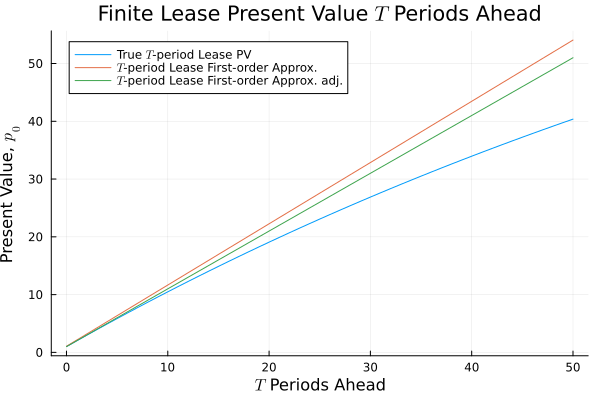

In [4]:
T = 0:50
g = 0.02
r = 0.03
x_0 = 1

# broadcast over the T range
y_1 = finite_lease_pv_true.(T, g, r, x_0)
y_2 = finite_lease_pv_approx.(T, g, r, x_0)
y_3 = finite_lease_pv_approx_2.(T, g, r, x_0)

plt = plot(title= L"Finite Lease Present Value $T$ Periods Ahead",
           xlabel = L"$T$ Periods Ahead", ylabel = L"Present Value, $p_0$",
           legend = :topleft)
plot!(plt, T, y_1, label=L"True $T$-period Lease PV")
plot!(plt, T, y_2, label=L"$T$-period Lease First-order Approx.")
plot!(plt, T, y_3, label=L"$T$-period Lease First-order Approx. adj.")

Evidently our approximations perform well for small values of $T$.

However, holding $g$ and r fixed, our approximations deteriorate as $T$ increases.

Next we compare the infinite and finite duration lease present values
over different lease lengths $T$.

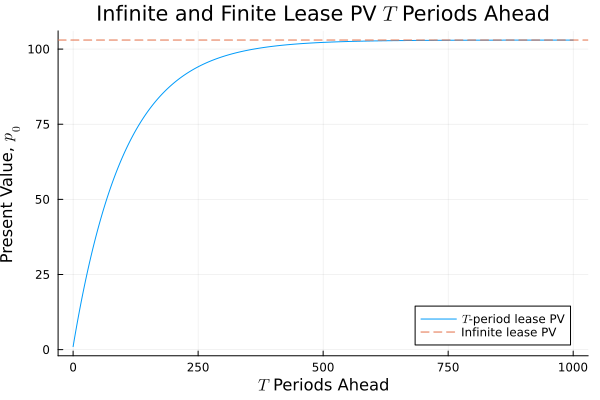

In [5]:
# Convergence of infinite and finite
T = 0:1000
y_1 = finite_lease_pv_true.(T, g, r, x_0) # broadcast
plt = plot(title= L"Infinite and Finite Lease PV $T$ Periods Ahead",
           xlabel = L"$T$ Periods Ahead", ylabel = L"Present Value, $p_0$",
           legend = :bottomright)

plot!(plt, T, y_1, label=L"$T$-period lease PV")
hline!(plt,  [infinite_lease(g, r, x_0)], linestyle = :dash,
       label="Infinite lease PV")

The graph above shows how as duration $T \rightarrow +\infty$,
the value of a lease of duration $T$ approaches the value of a
perpetual lease.

Now we consider two different views of what happens as $r$ and
$g$ covary

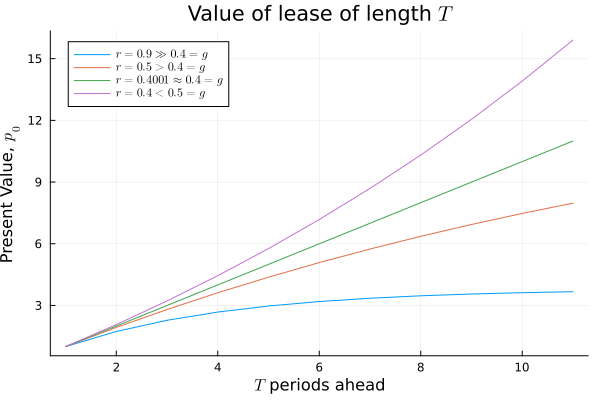

In [6]:
T=0:10

plt = plot(title= L"Value of lease of length $T$", legend = :topleft,
           xlabel = L"$T$ periods ahead", ylabel = L"Present Value, $p_0$")
plot!(plt, finite_lease_pv_true.(T, 0.4, 0.9, x_0),
      label=L"r=0.9 \gg 0.4 = g")
plot!(plt, finite_lease_pv_true.(T, 0.4, 0.5, x_0), label=L"r=0.5 > 0.4 = g")
plot!(plt, finite_lease_pv_true.(T, 0.4, 0.4001, x_0),
     label=L"r=0.4001 \approx 0.4 = g")
plot!(plt, finite_lease_pv_true.(T, 0.5, 0.4, x_0), label=L"r=0.4 < 0.5 = g")

This graph gives a big hint for why the condition $r > g$ is
necessary if a lease of length $T = +\infty$ is to have finite
value.

We can use a little calculus to study how the present value $p_0$
of a lease varies with $r$ and $g$.

We will use a new package called [Symbolics.jl](https://github.com/JuliaSymbolics/Symbolics.jl).

`Symbolics.jl` enables us to do symbolic math calculations including
computing derivatives of algebraic equations.

We will illustrate how it works by creating a symbolic expression that
represents our present value formula for an infinite lease.

After that, we'll use `Symbolics.jl` to compute derivatives

Our formula is

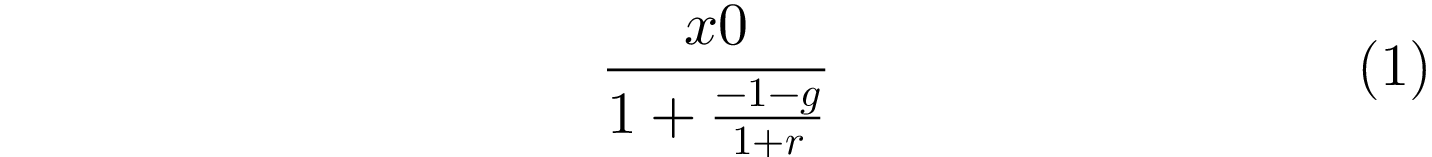

In [7]:
# Creates algebraic symbols that can be used in an algebraic expression
@variables g, r, x0
G = (1 + g)
R = (1 + r)
p0 = x0 / (1 - G * R ^ (-1))
print("Our formula is")
latexify(p0) |> s -> render(s, MIME("image/png"))

dp0 / dg is

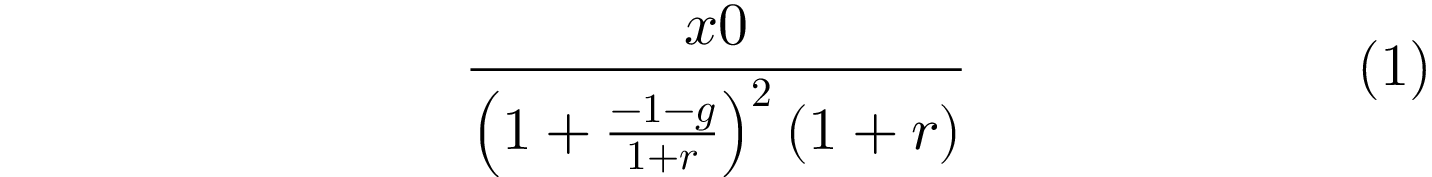

In [8]:
# Partial derivative with respect to g
dg = Differential(g)
dp_dg = expand_derivatives(dg(p0))
print("dp0 / dg is")
latexify(dp_dg) |> s -> render(s, MIME("image/png"))

dp0 / dr is

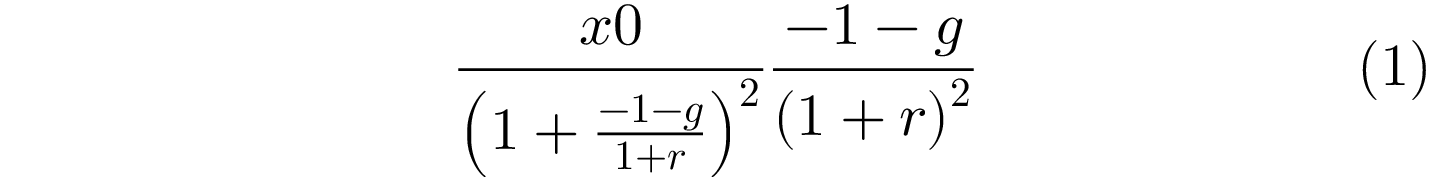

In [9]:
# Partial derivative with respect to r
dr = Differential(r)
dp_dr = expand_derivatives(dr(p0))
print("dp0 / dr is")
latexify(dp_dr) |> s -> render(s, MIME("image/png"))

We can see that for $\frac{\partial p_0}{\partial r}<0$ as long as
$r>g$, $r>0$ and $g>0$ and $x_0$ is positive,
so $\frac{\partial p_0}{\partial r}$ will always be negative.

Similarly, $\frac{\partial p_0}{\partial g}>0$ as long as $r>g$, $r>0$ and $g>0$ and $x_0$ is positive, so $\frac{\partial p_0}{\partial g}$
will always be positive.

## Back to the Keynesian Multiplier

We will now go back to the case of the Keynesian multiplier and plot the
time path of $y_t$, given that consumption is a constant fraction
of national income, and investment is fixed.

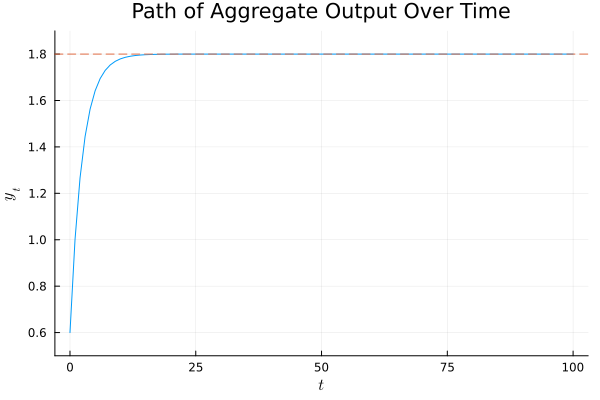

In [10]:
# Function that calculates a path of y
function calculate_y(i, b, g, T, y_init)
    y = zeros(T+1)
    y[1] = i + b * y_init + g
    for t = 2:(T+1)
        y[t] = b * y[t-1] + i + g
    end
  return y
end

# Initial values
i_0 = 0.3
g_0 = 0.3
b = 2/3 # proportion of income to consumption
y_init = 0
T = 100

plt = plot(0:T, calculate_y(i_0, b, g_0, T, y_init),
           title= "Path of Aggregate Output Over Time",
           ylim= (0.5, 1.9), xlabel = L"t", ylabel = L"y_t")
# Output predicted by geometric series
hline!([i_0 / (1 - b) + g_0 / (1 - b)], linestyle=:dash, seriestype="hline",
       legend = false)

In this model, income grows over time, until it gradually converges to
the infinite geometric series sum of income.

We now examine what will
happen if we vary the so-called **marginal propensity to consume**,
i.e., the fraction of income that is consumed

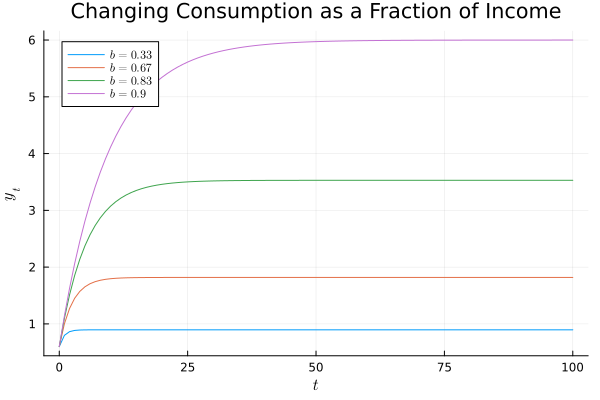

In [11]:
# Changing fraction of consumption
bs = round.([1/3, 2/3, 5/6, 0.9], digits = 2)

plt = plot(title= "Changing Consumption as a Fraction of Income",
           xlabel = L"t", ylabel = L"y_t", legend = :topleft)
[plot!(plt, 0:T, calculate_y(i_0, b, g_0, T, y_init), label=L"b = %$b")
 for b in bs]
plt

Increasing the marginal propensity to consume $b$ increases the
path of output over time.

Now we will compare the effects on output of increases in investment and government spending.

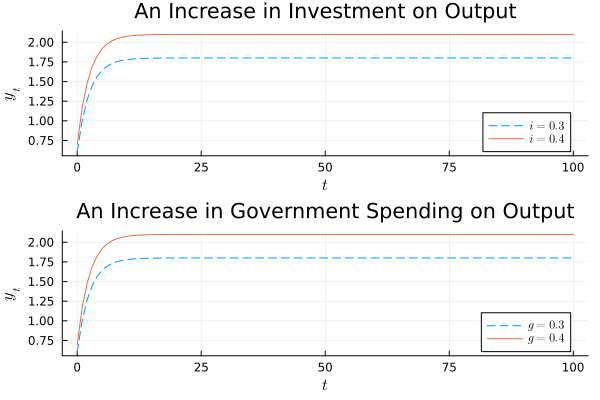

In [12]:
x = 0:T
y_0 = calculate_y(i_0, b, g_0, T, y_init)
l = @layout [a ; b]

# Changing initial investment:
i_1 = 0.4
y_1 = calculate_y(i_1, b, g_0, T, y_init)
plt_1 = plot(x,y_0, label = L"i=0.3", linestyle= :dash,
             title= "An Increase in Investment on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_1, x, y_1, label = L"i=0.4")

# Changing government spending
g_1 = 0.4
y_1 = calculate_y(i_0, b, g_1, T, y_init)
plt_2 = plot(x,y_0, label = L"g=0.3", linestyle= :dash,
             title= "An Increase in Government Spending on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_2, x, y_1, label=L"g=0.4")
plot(plt_1, plt_2, layout = l)

Notice here, whether government spending increases from 0.3 to 0.4 or
investment increases from 0.3 to 0.4, the shifts in the graphs are
identical.